In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Preprocesstrain images
train_generator = train_data_gen.flow_from_directory(
        './new_datasets/train',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical')
# Preprocess test images
validation_generator = validation_data_gen.flow_from_directory(
        './new_datasets/test',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical')

Found 17923 images belonging to 3 classes.
Found 4180 images belonging to 3 classes.


In [4]:
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create model structure
emotion_model = Sequential()

# Define input layer
emotion_model.add(Input(shape=(48, 48, 1)))

# Add convolutional layers, pooling layers, and dropout layers with batch normalization
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.3))

emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.3))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.4))

emotion_model.add(Flatten())
emotion_model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(3, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
                      metrics=['accuracy'])

In [5]:
# Implement early stopping and model checkpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_emotion_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:

# Assuming you have training and validation data generators
# train_generator = datagen.flow_from_directory('path/to/train', target_size=(48, 48), color_mode='grayscale', class_mode='categorical', batch_size=32)
# validation_generator = datagen.flow_from_directory('path/to/validation', target_size=(48, 48), color_mode='grayscale', class_mode='categorical', batch_size=32)

# Train the model
history = emotion_model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
  1/561 ━━━━━━━━━━━━━━━━━━━━ 12:42 1s/step - accuracy: 0.3125 - loss: 11.8116

/Users/bob/anaconda3/envs/Sch_dev/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.3981 - loss: 9.7461 - val_accuracy: 0.4746 - val_loss: 7.8974
Epoch 2/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.4709 - loss: 7.3154 - val_accuracy: 0.5737 - val_loss: 6.0060
Epoch 3/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.5088 - loss: 5.6670 - val_accuracy: 0.5947 - val_loss: 4.5433
Epoch 4/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.5489 - loss: 4.2680 - val_accuracy: 0.6141 - val_loss: 3.3843
Epoch 5/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.5576 - loss: 3.1796 - val_accuracy: 0.6136 - val_loss: 2.5093
Epoch 6/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.5865 - loss: 2.3727 - val_accuracy: 0.6371 - val_loss: 1.8801
Epoch 7/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.5995 - loss: 1.8278 - val_accuracy: 0.6517 - val_loss: 1.4797
Epoch 8/50
561/561 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.6139 - loss: 1.4700 - val_accurac

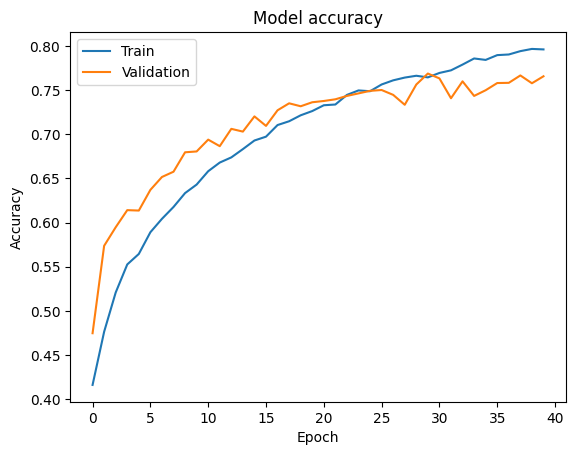

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# Evaluate the model on the validation data
batch_size = 32  # Define batch size
num_validation_samples = len(validation_generator.classes)  # Calculate total number of validation samples
steps = num_validation_samples // batch_size  # Calculate number of steps

loss, accuracy = emotion_model.evaluate(validation_generator)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7607 - loss: 0.7392
Validation Accuracy: 76.89%


In [11]:
model_json = emotion_model.to_json()
with open("final_model_v3.json",'w') as json_file:
    json_file.write(model_json)
emotion_model.save("final_model_v3.h5")